In [1]:
import numpy as np

def apply_f(a, f):
    if isinstance(a, list):
        return list(map(lambda t: apply_f(t, f), a))
    else:
        return f(a)


def basic_sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


def sigmoid(x):
    s = apply_f(x, lambda t: 1 / (1 + np.exp(-t)))
    return s


def sigmoid_derivative(x):
    ds = apply_f(x, lambda t: np.exp(-x) / (1 + np.exp(-x)) ** 2)
    return ds


def sigmoid_tan(x):
    s = apply_f(x, lambda t: (np.exp(t) - np.exp(-t)) / (np.exp(t) + np.exp(-t)))
    return s


def sigmoid_lin(x):
    s = apply_f(x, lambda t: t * 1)
    return s


def sigmoid_limit(x):
    a = dir(x)[0]
    if (a == "T"):
        s1 = lambda t: 1 if (t >= 0) else 0
        s2 = np.vectorize(s1)
        s = s2(x)
    else:
        s = apply_f(x, lambda t: 1 if (t >= 0) else 0)
    return s


def sigmoid_relu(x):
    a = dir(x)[0]
    if (a == "T"):
        s1 = lambda t: t if (t >= 0) else 0
        s2 = np.vectorize(s1)
        s = s2(x)
    else:
        s = apply_f(x, lambda t: t if (t >= 0) else 0)
    return s


def image_to_vector(image):
    v = image.ravel()
    v_1 = np.zeros(shape=(v.size, 1))
    for i in range(v.size):
        v_1[i, 0] = v[i]
    return v_1


def softmax(x):
    s = np.exp(x)
    s_new = np.zeros(shape=x.shape)
    shape_1 = x.shape[0]
    shape_2 = x.shape[1]
    for i in range(shape_1):
        s_1 = np.sum(s, axis=1)
        for j in range(shape_2):
            s_new[i, j] = s[i, j] / s_1[i]
    return s_new


def normalize(x):
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
    x_new = np.zeros(shape=x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x_new[i, j] = x[i, j] / x_norm[i]
    return x_new

In [2]:
import matplotlib.pyplot as plt
import pylab


def test_basic_sigmoid():
    assert round(basic_sigmoid(3), 2) == 0.95
    print("test_basic_sigmoid")


def test_sigmoid():
    x = np.array([1, 2, 3])
    res = sigmoid(x)
    assert round(res[0], 2) == 0.73
    assert round(res[1], 2) == 0.88
    assert round(res[2], 2) == 0.95
    print("test_sigmoid")

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    x = np.linspace(-10, 10, 100)
    plt.plot(x, sigmoid(x))
    plt.show()


def test_sigmoid_derivative():
    x = np.array([1, 2, 3])
    res = sigmoid_derivative(x)
    assert round(res[0], 2) == 0.20
    assert round(res[1], 2) == 0.10
    assert round(res[2], 3) == 0.045
    print("test_sigmoid_derivative")


def test_sigmoid_fun():
    fig = plt.figure()
    ax_1 = fig.add_subplot(2, 2, 1)
    ax_2 = fig.add_subplot(2, 2, 2)
    ax_3 = fig.add_subplot(2, 2, 3)
    ax_4 = fig.add_subplot(2, 2, 4)

    ax_1.spines['left'].set_position('center')
    ax_1.spines['bottom'].set_position('center')

    ax_2.spines['left'].set_position('center')
    ax_2.spines['bottom'].set_position('center')

    ax_3.spines['left'].set_position('center')
    ax_3.spines['bottom'].set_position('center')

    ax_4.spines['left'].set_position('center')
    ax_4.spines['bottom'].set_position('center')

    x = np.linspace(-10, 10, 100)
    pylab.subplot(2, 2, 1)
    pylab.plot(x, sigmoid_relu(x))
    pylab.title("sigmoid_relu")

    pylab.subplot(2, 2, 2)
    pylab.plot(x, sigmoid_tan(x))
    pylab.title("sigmoid_tan")

    pylab.subplot(2, 2, 3)
    pylab.plot(x, sigmoid_lin(x))
    pylab.title("sigmoid_lin")

    pylab.subplot(2, 2, 4)
    pylab.plot(x, sigmoid_limit(x))
    pylab.title("sigmoid_limit")

    plt.show()


def test_image_to_vector():
    image = np.array([
        [[0.67826139, 0.29380381],
         [0.90714982, 0.52835647],
         [0.4215251, 0.45017551]],

        [[0.92814219, 0.96677647],
         [0.85304703, 0.52351845],
         [0.19981397, 0.27417313]],

        [[0.60659855, 0.00533165],
         [0.10820313, 0.49978937],
         [0.34144279, 0.94630077]]
    ])
    res = image_to_vector(image)
    assert round(res[5, 0], 2) == 0.45
    assert round(res[8, 0], 2) == 0.85
    assert round(res[2, 0], 2) == 0.91
    print("test_image_to_vector")


def test_softmax():
    x = np.array([
        [9, 2, 5, 0, 0],
        [7, 5, 0, 0, 0]])
    res = softmax(x)
    assert round(res[1, 0], 2) == 0.88
    assert round(res[0, 3], 5) == 0.00012
    assert round(res[0, 0], 2) == 0.98
    print("test_softmax")


def test_normalize():
    x = np.array([
        [0, 3, 4],
        [1, 6, 4]])
    res = normalize(x)
    assert res[0, 1] == 0.6
    assert round(res[1, 1], 2) == 0.82
    assert res[0, 2] == 0.8
    print("test_normalize")

test_basic_sigmoid
test_sigmoid


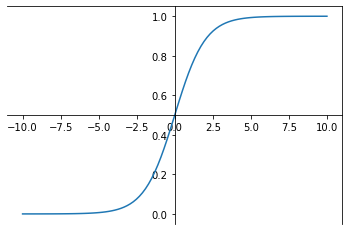

test_sigmoid_derivative


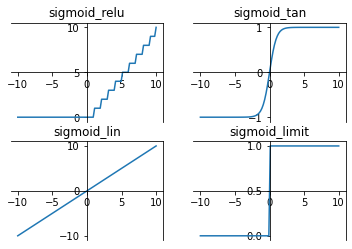

test_image_to_vector
test_softmax
test_normalize


In [3]:
test_basic_sigmoid()
test_sigmoid()
test_sigmoid_derivative()
test_sigmoid_fun()
test_image_to_vector()
test_softmax()
test_normalize()